1. FinanceDataReader

FinanceDataReader는 한국 주식 가격, 미국 주식 가격, 지수, 환율, 암호 화폐 가격, 종목 리스트 등을 제공하는 API 패키지이다.

In [1]:
pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 838.1 kB/s eta 0:00:00


In [2]:
import FinanceDataReader as fdr

1-1. 종목 리스트 가져오기

In [3]:
from FinanceDataReader.krx.data import KrxDailyDetailReader
# StockListing() 함수에 'KRX' 심볼을 전달하면, 한국 거래소에 상장된 전체 종목 리스트를 출력한다.

df_krx = fdr.StockListing('KRX')
type(df_krx)

pandas.core.frame.DataFrame

In [4]:
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,86500,1,1900,2.25,85600,86500,85200,30167972,2594334084800,516386190575000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,235500,1,5500,2.39,228500,237500,227500,3210991,747334912000,171444556957500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,356500,2,-2500,-0.70,359000,361500,352000,142522,50848691500,83421000000000,234000000,STK
3,005380,KR7005380001,현대차,KOSPI,,279000,1,1500,0.54,277500,282000,277000,433855,121211120500,58427117289000,209416191,STK
4,207940,KR7207940008,삼성바이오로직스,KOSPI,,804000,1,1000,0.12,808000,808000,798000,41850,33660938000,57223896000000,71174000,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,002995,KR7002991008,금호건설우,KOSPI,,10300,1,170,1.68,10040,10300,10040,2713,27451370,3010339800,292266,STK
2815,258250,KR7258250000,셀젠텍,KONEX,일반기업부,600,0,0,0.00,0,0,0,0,0,2993625000,4989375,KNX
2816,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1410,2,-239,-14.49,1549,1549,1410,11,15649,2227743600,1579960,KNX
2817,181340,KR7181340001,이즈미디어,KOSDAQ,관리종목(소속부없음),58,2,-17,-22.67,64,75,58,4929700,312353309,1163420028,20058966,KSQ


In [5]:
# StockListing() 함수에 미국 'S&P500' 심볼을 전달하면, S&P 500 지수에 등록된 전체 종목 리스트를 출력할 수 있다.
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [6]:
print(f"s&p 종목 데이터프레임의 크기 : {len(df_spx)}")

s&p 종목 데이터프레임의 크기 : 503


1-2. 가격 가져오기

In [7]:
# 한국 거래소에 상장된 종목은 단축 코드(여섯 자리)를 전달하면 가격 데잍러를 가져올 수 있다.
# GS 글로벌, 2018년 ~ 현재

df = fdr.DataReader('001250', '2018')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,2795,2860,2795,2850,118224,0.019678
2018-01-03,2850,2860,2820,2845,152892,-0.001754
2018-01-04,2845,2860,2815,2820,195786,-0.008787
2018-01-05,2820,2920,2820,2900,283369,0.028369
2018-01-08,2900,2940,2870,2900,179173,0.000000
...,...,...,...,...,...,...
2024-07-01,4000,4040,3515,3640,10196574,-0.099010
2024-07-02,3670,3685,3390,3530,6466972,-0.030220
2024-07-03,3455,3480,3260,3405,5016269,-0.035411


In [9]:
# 미국 주가 데이터를 가져올 때는 티거(Ticker) 명을 사용한다. 티커란, 미국에서 사용하는 종목 코드이며 네 자리로 제안된다.
# 애플(AAPL), 2017년 ~ 현재
df = fdr.DataReader('AAPL', '2017')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952713,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922539,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059448,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361122,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611732,134247600
...,...,...,...,...,...,...
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900


<거래소별 전체 종목 코드 - StockListing() 함수>
- 한국 거래소 : KRX(KOSPI, KOSDAQ, KONEX)
- 미국 거래소 : NASDAQ, NYSE, AMEX, S&P500

<가격 데이터 - DataReader() 함수>
- 국내 주식 : 005930(삼성전자), 091990(셀트리온헬스케어) 등
- 해외 주식 : AAPL(애플), AMZN(아마존), GOOG(구글) 등
- 각종 지수 : KS11(코스피 지수), KQ11(코스닥 지수), DJI(다우 지수), IXIC(나스닥 지수), US500(S&P5000)
- 환율 데이터 : USD/KRX(원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRX(위완화 원화 환율)
- 암호 화폐 가격 : BTC/USD(비트코인 달러 가격, 비트파이넥스), BTC/KRW(비트코인 원화 가격, 빗썸)

이외 상세한 옵션은 API 사용자 메뉴얼을 참고해주세요.
첨고 : https://github.com/FinanceData/FinanceDataReader/wiki/Users-Guide

1-3. 다양한 예시

In [10]:
# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615891,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608814,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797436,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200
...,...,...,...,...,...,...
2018-03-23,42.097500,42.480000,41.235001,41.235001,39.048515,164115200
2018-03-26,42.017502,43.275002,41.610001,43.192501,40.902222,150164800
2018-03-27,43.419998,43.787498,41.730000,42.084999,39.853451,163690400


In [11]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
df

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2015-01-02,1914.24,1929.15,1909.67,1926.44,258775885,0.0057,1,10.85,3696028799879,1198010247681352
2015-01-05,1921.96,1921.96,1903.37,1915.75,313442610,-0.0055,2,-10.69,4700135929435,1191526455202872
2015-01-06,1895.48,1900.02,1877.38,1882.45,303687925,-0.0174,2,-33.30,4755440391286,1171167156909625
2015-01-07,1878.90,1887.60,1876.27,1883.83,280509954,0.0007,1,1.38,3762677011518,1171990821193613
2015-01-08,1895.85,1907.23,1891.77,1904.65,262207104,0.0111,1,20.82,4395567023635,1185170312393668
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,2792.96,2805.95,2783.98,2804.31,459218341,0.0023,1,6.49,9945336827186,2289631234045977
2024-07-02,2798.65,2805.42,2776.62,2780.86,538842197,-0.0084,2,-23.45,11648477198292,2270445338129264
2024-07-03,2797.14,2799.70,2774.71,2794.01,340337982,0.0047,1,13.15,10243957490730,2281636129094657


In [13]:
# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0.0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0.0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0.0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0.0
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0.0
...,...,...,...,...,...,...
2024-07-01,1380.290039,1384.680054,1376.829956,1380.290039,1380.290039,0.0
2024-07-02,1383.420044,1390.219971,1382.619995,1383.420044,1383.420044,0.0
2024-07-03,1383.420044,1391.869995,1381.329956,1383.420044,1383.420044,0.0


In [14]:
# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,5.060929e+05,5.125672e+05,5.022874e+05,5.101036e+05,5.101036e+05,42607754105
2016-01-02,5.104418e+05,5.121330e+05,5.072097e+05,5.090512e+05,5.090512e+05,35346951870
2016-01-03,5.092157e+05,5.094095e+05,4.989786e+05,5.051554e+05,5.051554e+05,46559806550
2016-01-04,5.052142e+05,5.172751e+05,5.059330e+05,5.146464e+05,5.146464e+05,45723198025
2016-01-05,5.146202e+05,5.148096e+05,5.100812e+05,5.139287e+05,5.139287e+05,41073608576
...,...,...,...,...,...,...
2024-07-01,8.410399e+07,8.687198e+07,8.375108e+07,8.657668e+07,8.657668e+07,23942151380167
2024-07-02,8.657021e+07,8.825699e+07,8.638649e+07,8.700219e+07,8.700219e+07,35254337763804
2024-07-03,8.699172e+07,8.780150e+07,8.564914e+07,8.601760e+07,8.601760e+07,27944884315333


2. 웹 스크래핑 익히기

In [15]:
pip install beautifulSoup4

In [16]:
# bs4라는 패키지로부터 BeautifulSoup라는 모듈을 임포트
from bs4 import BeautifulSoup

In [18]:
# HTML 문서를 문자열 html로 저장
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span>
                <span class = 'price'> 29000 </span>
                <span class = 'menu'> 의류</span>
                <a href = 'http://www.naver.com'> 바로가기 </a>
            </p>
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span>
                <span class = 'menu'> 악세서리 </span>
                <a href = 'http://www.facebook.com'> 바로가기 </a>
            </p>
        </h1>
    </body>
</html>
'''

In [19]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

BeautifulSoup(입력 문자열, 'html.parser')라는 코드는 이 입력은 HTML 문법으로 작성되어져 있으니 HTML 문법을 기반으로 파싱하라는 의미이다. 이렇게 인스턴스를 생성하고나면 본격적으로 정보를 가져오는 것은 select()를 가지고 수행한다.

인스턴스의 이름은 soup이므로 soup.select()를 통해서 정보를 가져온다.. select()의 사용 방법은 요약하자면 soup.select('찾는 정보')이다.


soup.select('태그명') : 태그를 입력으로 사용할 경우 \
soup.select('.클래스명') : 클래스를 입력으로 사용할 경우 \
soup.select('#아이디') : ID를 입력으로 사용할 경우 \
soup.select('상위태그 하위태그') : 자손 관계 (띄어쓰기) \
soup.select('상위태그 > 하위태그') : 자식 관계 ( > )

In [20]:
# <body> 태그를 입력
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [21]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [22]:
print(soup.select('html > h1'))

[]


3. 웹 스크래핑 실습

3-1. 종목의 가격 데이터 크롤링

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

In [24]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'


In [25]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)


In [26]:
response.text


'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/finance_header.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240628183008/css/newstock3.css">\n<link rel="st

In [27]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")
table = pd.read_html(str(html_table))
print('파싱된 테이블의 개수 :', len(table))


파싱된 테이블의 개수 : 2


In [28]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'
for page in range(1, 100):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = pd.concat([df, table[0].dropna()], ignore_index=True)


https://finance.naver.com/item/sise_day.nhn?code=068270&page=1
https://finance.naver.com/item/sise_day.nhn?code=068270&page=2
https://finance.naver.com/item/sise_day.nhn?code=068270&page=3
https://finance.naver.com/item/sise_day.nhn?code=068270&page=4
https://finance.naver.com/item/sise_day.nhn?code=068270&page=5
https://finance.naver.com/item/sise_day.nhn?code=068270&page=6
https://finance.naver.com/item/sise_day.nhn?code=068270&page=7
https://finance.naver.com/item/sise_day.nhn?code=068270&page=8
https://finance.naver.com/item/sise_day.nhn?code=068270&page=9
https://finance.naver.com/item/sise_day.nhn?code=068270&page=10
https://finance.naver.com/item/sise_day.nhn?code=068270&page=11
https://finance.naver.com/item/sise_day.nhn?code=068270&page=12
https://finance.naver.com/item/sise_day.nhn?code=068270&page=13
https://finance.naver.com/item/sise_day.nhn?code=068270&page=14
https://finance.naver.com/item/sise_day.nhn?code=068270&page=15
https://finance.naver.com/item/sise_day.nhn?code=

In [29]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.07.05,184600.0,"상승 1,700",183500.0,187500.0,181800.0,615191.0
1,2024.07.04,182900.0,"상승 1,100",182800.0,184400.0,180900.0,393223.0
2,2024.07.03,181800.0,"하락 2,700",185000.0,185400.0,180400.0,459161.0
3,2024.07.02,184500.0,상승 400,184100.0,185700.0,180800.0,738377.0
4,2024.07.01,184100.0,"상승 9,800",175200.0,184100.0,175200.0,1050615.0
...,...,...,...,...,...,...,...
985,2020.07.07,308500.0,"상승 3,000",305500.0,316000.0,303000.0,1003857.0
986,2020.07.06,305500.0,"하락 4,000",308500.0,313000.0,304500.0,759792.0
987,2020.07.03,309500.0,"상승 1,000",311500.0,312000.0,300500.0,760954.0
988,2020.07.02,308500.0,"상승 11,000",298000.0,311500.0,298000.0,1134489.0


In [30]:
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
df

,날짜,종가,전일비,시가,고가,저가,거래량
29,2024.05.24,179900.0,"하락 3,600",182600.0,183800.0,179600.0,487217.0
28,2024.05.27,179600.0,하락 300,180600.0,181200.0,178500.0,401269.0
27,2024.05.28,180900.0,"상승 1,300",179600.0,182400.0,178500.0,411965.0
26,2024.05.29,178900.0,"하락 2,000",179200.0,179900.0,177100.0,493642.0
25,2024.05.30,177300.0,"하락 1,600",177500.0,181400.0,177200.0,357482.0
24,2024.05.31,176200.0,"하락 1,100",179700.0,182000.0,176100.0,882885.0
23,2024.06.03,179000.0,"상승 2,800",177200.0,180700.0,176800.0,309816.0
22,2024.06.04,188100.0,"상승 9,100",177900.0,189900.0,177900.0,1291227.0
21,2024.06.05,190300.0,"상승 2,200",189400.0,193600.0,188200.0,890135.0
20,2024.06.07,191100.0,상승 800,191800.0,192600.0,188500.0,494141.0


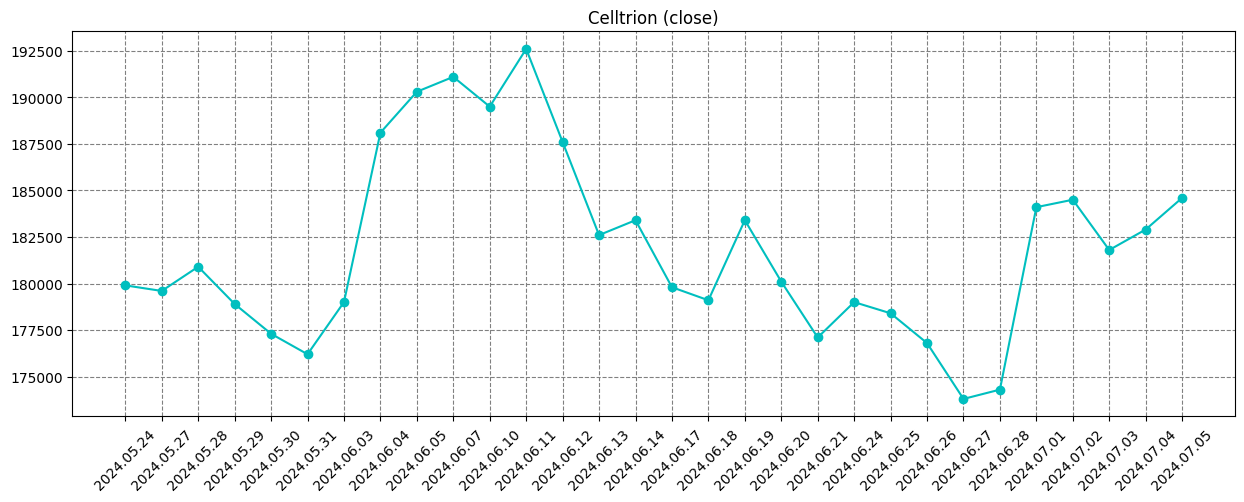

In [31]:
plt.figure(figsize=(15, 5))
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()


3-2. 캔들차트 시각화

In [32]:
!pip install --upgrade mpl_finance

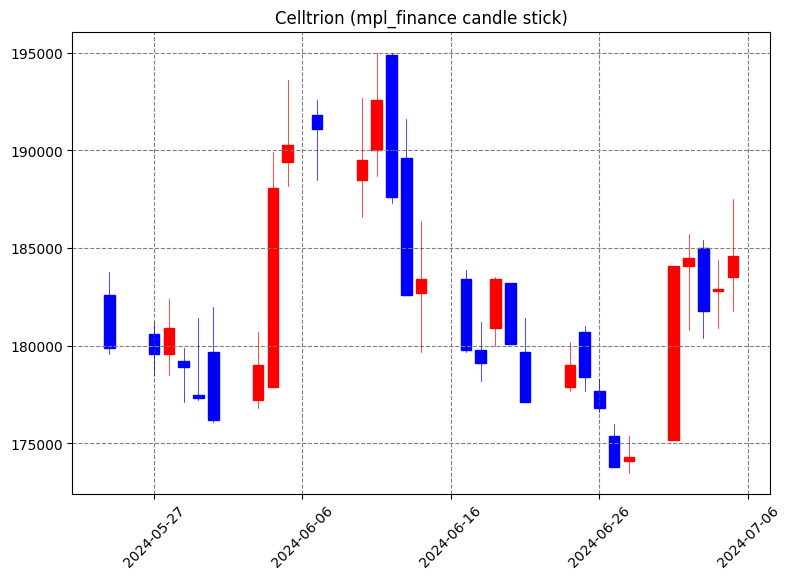

In [33]:
from mpl_finance import candlestick_ohlc

df = df.sort_values(by='날짜')

for idx in range(0, len(df)):
    # 날짜열을 datetime 형으로 변환.
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    # datetime 형을 float 형으로 변환
    df['날짜'].values[idx] = mdates.date2num(dt)

# candlestick_ohlc()에서 요구하는 형식으로 변경
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)
plt.title('Celltrion (mpl_finance candle stick)')

# candlestick_ohlc 함수를 이용하여 캔들차트를 그린다.
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')

# x축의 레이블이 숫자. %Y-%m-%d 형식 문자열로 변환하여 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()


4. 웹 스크래핑 실습 2 : 금융 뉴스 텍스트 분석

In [ ]:
# 4-1. 텍스트 마이닝을 위한 지식 : 토큰화

# 텍스트 분석에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리 되지 않은 상태라면,
# 해당 데이터를 사용하고자 하는 용도에 맞게 토큰화(tokenization)하는 일을 하게 된다.

# 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 한다.
# 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 코튼을 정의한다.

In [34]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 45.5 MB/s eta 0:00:00


In [35]:
# 단어 토큰화

# 1) morphs : 형태소 추출 (단어 토큰화)
# 2) pos : 품사 태깅(Part-of-speech tagging)
# 3) nouns : 명사 추출

from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [36]:
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [37]:
# 뉴스 본문 추출

#newspaper3k는 뉴스 데이터를 크롤링을 위한 패키지이다.
# 사용자가 인터넷 뉴스 기사의 url을 전달해주면, 이로부터 뉴스 기사의 제목과 텍스트를 추출

!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=9e554b6daa496b3d010a52fdae319755ea8fd6f72ad76d4719640af3d8250214
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=d80212829557fc8b43d95704d1946ac7995969d97bbd26e6533b5da149ad4cae
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [41]:
from newspaper import Article

# 파싱할 뉴스 기사 주소
url = 'https://finance.naver.com/item/news_read.nhn?article_id=0004960169&office_id=018&code=005930&page=10&sm='

# 언어가 한국어이므로 language='ko'로 설정
article = Article(url, language='ko')
article.download()
article.parse()

# 기사 내용 출력
print('기사 내용 :')
print(article.text)


기사 내용 :



In [ ]:
!apt -qq -y update
!apt -qq -y install fonts-nanum
!fc-cache -fv


47 packages can be upgraded. Run 'apt list --upgradable' to see them.
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dir

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Retina 디스플레이를 위한 설정
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

# 폰트 매니저 업데이트
fm.fontManager.addfont(fontpath)
fm._load_fontmanager(try_read_cache=False)


/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


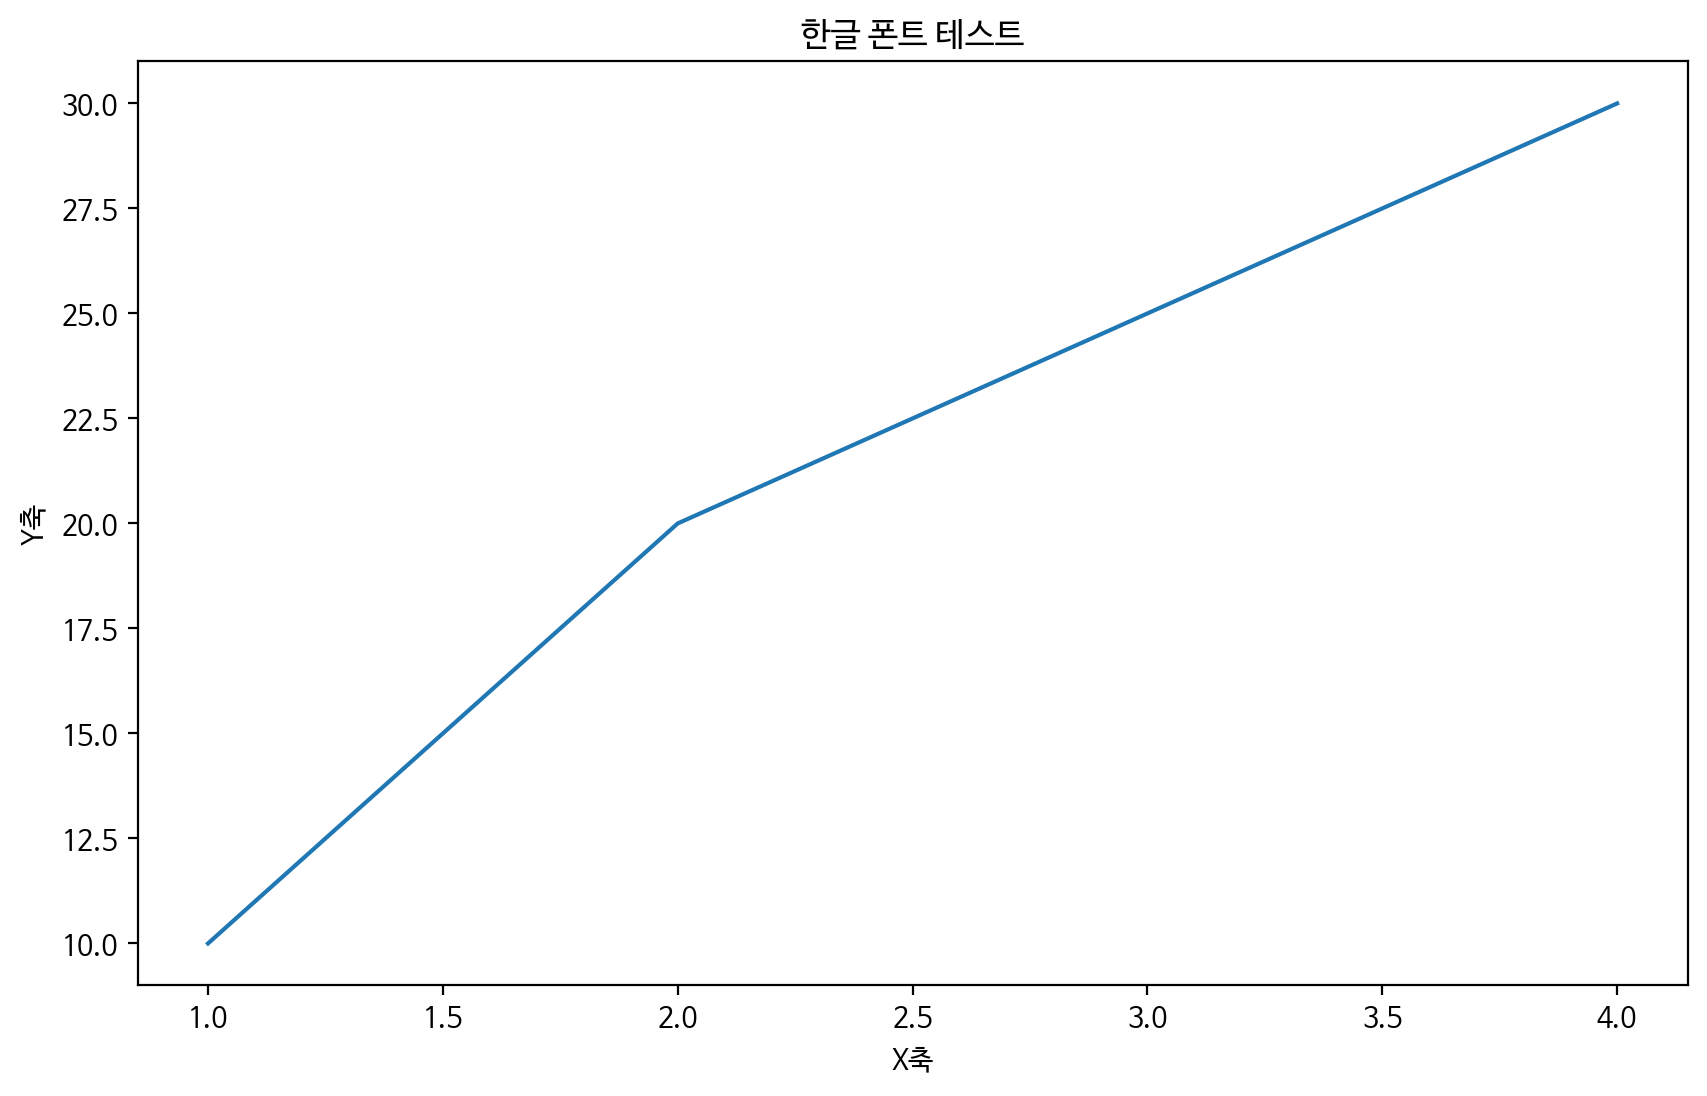

In [ ]:
# 설치된 폰트 목록 확인
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'NanumBarunGothic' in font:
        print(font)

# 간단한 플롯 그리기
plt.figure(figsize=(10,6))
plt.title('한글 폰트 테스트')
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X축')
plt.ylabel('Y축')
plt.show()


In [42]:
# 회사명과 종목 코드 얻기

import pandas as pd

# 종목별 뉴스 크롤링에서는 각 회사명과 종목코드에 대한 정보가 필요하다.
# 예를 들어서 삼성전자 종목의 종목코드는 '005930'
# 이러한 정보를 얻고자 kind라는 사이트에서 해당 정보가 적힌 테이블이 잇는 링크를 발견하여 사용하기로 했다.

dfstockcode = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
2,E1,17940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 김회언, 조태제 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD현대마린솔루션,443060,"건축기술, 엔지니어링 및 관련 기술 서비스업","AM(After Market) 솔루션, 친환경 Retrofit, 디지털 제어",2024-05-08,12월,이기동,http://www.hd-marinesolution.com/,부산광역시
...,...,...,...,...,...,...,...,...,...
2698,큐러블,86460,자연과학 및 공학 연구개발업,유전체 분석 서비스,2013-07-01,12월,김승일,http://www.snp-genetics.com,경기도
2699,타스컴,336040,의료용 기기 제조업,당뇨질환 세포치료제 / 당뇨관리 의료기기,2019-12-02,12월,이인근,http://www.yidobio.com,경기도
2700,테크엔,308700,전구 및 조명장치 제조업,LED조명장치,2018-12-21,12월,박철,http://www.techen.co.kr,대구광역시
2701,파워풀엑스,266870,기타 화학제품 제조업,플렉스파워 리커버리크림,2017-04-24,12월,박인철,http://www.flexpower.co.kr,서울특별시


In [ ]:
dfstockcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2702 non-null   object
 1   종목코드    2702 non-null   int64 
 2   업종      2702 non-null   object
 3   주요제품    2688 non-null   object
 4   상장일     2702 non-null   object
 5   결산월     2702 non-null   object
 6   대표자명    2702 non-null   object
 7   홈페이지    2518 non-null   object
 8   지역      2702 non-null   object
dtypes: int64(1), object(8)
memory usage: 190.1+ KB


In [43]:
dfstockcode.isnull().sum()

# 주요제품 열에는 19개, 홈페이지 열에는 183개가 있습니다만 저희가 사용할 열은 회사명과 종목코드에 대한 열이므로 다른 열에 결측값이 있는 것은 상관없다.

회사명       0
종목코드      0
업종        0
주요제품     14
상장일       0
결산월       0
대표자명      0
홈페이지    183
지역        0
dtype: int64

In [44]:
# 종목코드는 기본적으로 총 6개로 이루어져 있는데 데이터프레임을 보면 DRB동일의 종목 코드가 4840으로 되어져 있다.

# 이렇게 된 이유는 종목 코드 열이 int64으로 정수형 타입으로 읽혔기 때문
# 정수형 타입인 경우에는 데이터프레임이 004840을 4840으로 읽는다.
# 앞에 0 2개는 굳이 붙일 필요가 없기 때문
# 이런 경우에는 앞에 00을 붙이면서 해당 열을 문자열 타입으로 변경해주므르서 앞에 붙는 0들을 인식하도록 해준다.

dfstockcode.종목코드 = dfstockcode.종목코드.map('{:06d}'.format)
dfstockcode

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
1,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://www.drbworld.com,부산광역시
2,E1,017940,기타 전문 도매업,"LPG(프로판,부탄가스),가스기기판매",1997-08-27,12월,"구자용, 천정식 (각자 대표이사)",http://www.e1.co.kr,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 김회언, 조태제 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD현대마린솔루션,443060,"건축기술, 엔지니어링 및 관련 기술 서비스업","AM(After Market) 솔루션, 친환경 Retrofit, 디지털 제어",2024-05-08,12월,이기동,http://www.hd-marinesolution.com/,부산광역시
...,...,...,...,...,...,...,...,...,...
2698,큐러블,086460,자연과학 및 공학 연구개발업,유전체 분석 서비스,2013-07-01,12월,김승일,http://www.snp-genetics.com,경기도
2699,타스컴,336040,의료용 기기 제조업,당뇨질환 세포치료제 / 당뇨관리 의료기기,2019-12-02,12월,이인근,http://www.yidobio.com,경기도
2700,테크엔,308700,전구 및 조명장치 제조업,LED조명장치,2018-12-21,12월,박철,http://www.techen.co.kr,대구광역시
2701,파워풀엑스,266870,기타 화학제품 제조업,플렉스파워 리커버리크림,2017-04-24,12월,박인철,http://www.flexpower.co.kr,서울특별시


In [45]:
stock_to_code = dict(zip(dfstockcode.회사명, dfstockcode.종목코드))
stock_to_code['삼성전자']

'005930'

In [ ]:
# 네이버 쇼핑 리뷰 워드클라우드

In [ ]:

# import pandas as pd
# import numpy as np

# df = pd.read_table('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', names=['ratings', 'reviews'])

# import pandas as pd # 판다스
# import numpy as np # 넘파이
# import matplotlib.pyplot as plt # 맷플롯립
# from konlpy.tag import Okt # 형태소 분석기 Okt
# from collections import Counter
# from wordcloud import WordCloud

# df = pd.read_table('https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt', names=['ratings', 'reviews'])

# # 중복 샘플 제거
# df.drop_duplicates(subset=['reviews'], inplace=True)

# tokenizer = Okt()
# df['tokenized'] = df['reviews'].apply(tokenizer.nouns)

# df['label'] = np.select([df.ratings > 3], [1], default=0)

# positive_reviews = np.hstack(df[df['label']==1]['tokenized'].values)
# negative_reviews = np.hstack(df[df['label']==0]['tokenized'].values)

# positive_reviews_word_count = Counter(positive_reviews)
# print(positive_reviews_word_count.most_common(20))

# negative_reviews_word_count = Counter(negative_reviews)
# print(negative_reviews_word_count.most_common(20))


In [ ]:
# # 긍정 리뷰의 워드 클라우드
# plt.figure(figsize = (15,15))
# temp_data = ' '.join(np.concatenate(df[df['label']==1].tokenized.reset_index(drop=True)))
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
# plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# # 부정 리뷰의 워드 클라우드
# plt.figure(figsize = (15,15))
# temp_data = ' '.join(np.concatenate(df[df['label']==0].tokenized.reset_index(drop=True)))
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
# plt.imshow(wc, interpolation = 'bilinear')


5. 회귀 분석과 상관 관계 분석 : 다우존스지수와 코스피 지수

In [ ]:
# 5-1. 다우존스지수와 코스피지수의 변동률 비교

In [46]:
dow = fdr.DataReader('DJI', '2010-06-01')
dow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-01,10133.940430,10218.330078,10013.900391,10024.019531,10024.019531,221900000
2010-06-02,10025.610352,10254.219727,10025.610352,10249.540039,10249.540039,200850000
2010-06-03,10250.669922,10315.209961,10175.019531,10255.280273,10255.280273,176870000
2010-06-04,10249.610352,10249.690430,9889.879883,9931.969727,9931.969727,256600000
2010-06-07,9931.750000,9982.379883,9810.299805,9816.490234,9816.490234,222940000
...,...,...,...,...,...,...
2024-06-27,39107.101563,39250.691406,39026.750000,39164.058594,39164.058594,338010000
2024-06-28,39092.390625,39443.601563,38937.148438,39118.859375,39118.859375,679630000
2024-07-01,39186.199219,39438.359375,39037.941406,39169.519531,39169.519531,346210000


In [47]:
kospi = fdr.DataReader('KS11', '2010-06-01')
kospi

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2010-06-01,1634.55,1643.08,1623.40,1630.40,314094804,-0.0066,2,-10.85,4900310586572,898272667120685
2010-06-03,1643.74,1663.67,1641.77,1661.84,308759704,0.0193,1,31.44,5180056863403,915532558347080
2010-06-04,1660.99,1670.94,1658.52,1664.13,286092937,0.0014,1,2.29,5138448453916,917028169407885
2010-06-07,1628.06,1638.88,1618.57,1637.97,300882140,-0.0157,2,-26.16,4872722835783,902839216937915
2010-06-08,1635.01,1656.37,1630.43,1651.48,280287783,0.0082,1,13.51,4997057755917,910046700953705
...,...,...,...,...,...,...,...,...,...,...
2024-07-01,2792.96,2805.95,2783.98,2804.31,459218341,0.0023,1,6.49,9945336827186,2289631234045977
2024-07-02,2798.65,2805.42,2776.62,2780.86,538842197,-0.0084,2,-23.45,11648477198292,2270445338129264
2024-07-03,2797.14,2799.70,2774.71,2794.01,340337982,0.0047,1,13.15,10243957490730,2281636129094657


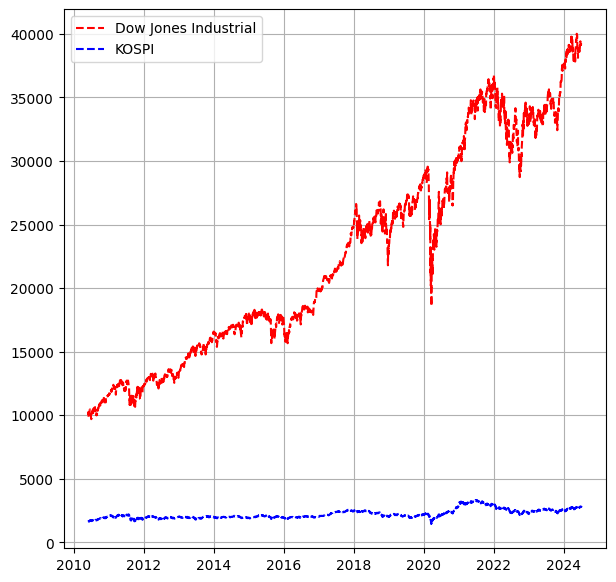

In [48]:
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b--', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
# 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘 종가의 변동률을 구할 수 있다.
# 이렇게 가격이 다른 두 주식 종목의 수익률를 비교하는 방법을 지수화라고 한다.
# 다우존스 지수와 코스피 지수 모두 2010년 6월 1일을 기준으로 변동률을 구해보자

In [49]:
d = (dow.Close / dow.Close.loc['2010-06-01']) * 100
k = (kospi.Close / kospi.Close.loc['2010-06-01']) * 100

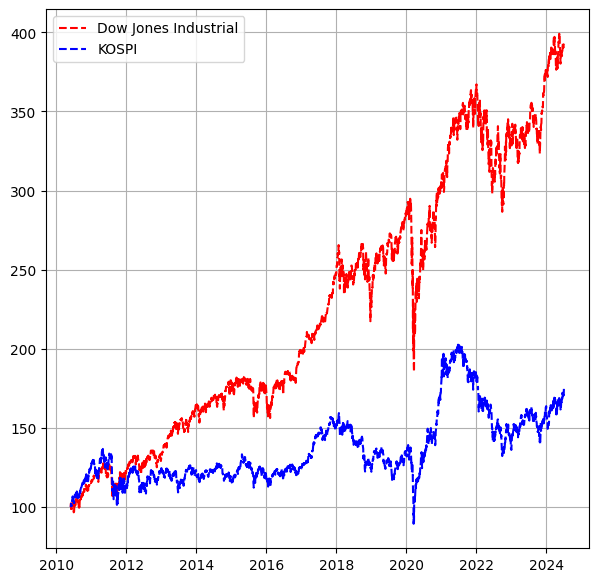

In [50]:
plt.figure(figsize=(7, 7))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b--', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [51]:
# 5-2. 다우존스지수와 코스피지수의 산점도 시각화
print(len(dow))
print(len(kospi))

3547
3477


In [ ]:
# plt.scatter(dow, kospi)  # 에러 발생
# 산점도를 그리려면 X와 Y의 사이즈가 동일해야 한다.


In [52]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI': kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.019531,1630.40
2010-06-02,10249.540039,NaN
2010-06-03,10255.280273,1661.84
2010-06-04,9931.969727,1664.13
2010-06-07,9816.490234,1637.97
...,...,...
2024-07-01,39169.519531,2804.31
2024-07-02,39331.851563,2780.86
2024-07-03,39308.000000,2794.01


In [53]:
df.isnull().sum()

DOW      111
KOSPI    181
dtype: int64

In [54]:
df = df.fillna(method='bfill')  # 결측값 뒤에 있는 값으로 결측값 덮어씀
df = df.fillna(method='ffill')  # 결측값 앞에 있는 값으로 결측값 덮어씀
df

,DOW,KOSPI
Date,,
2010-06-01,10024.019531,1630.40
2010-06-02,10249.540039,1661.84
2010-06-03,10255.280273,1661.84
2010-06-04,9931.969727,1664.13
2010-06-07,9816.490234,1637.97
...,...,...
2024-07-01,39169.519531,2804.31
2024-07-02,39331.851563,2780.86
2024-07-03,39308.000000,2794.01


In [55]:
df.isnull().sum()

DOW      0
KOSPI    0
dtype: int64

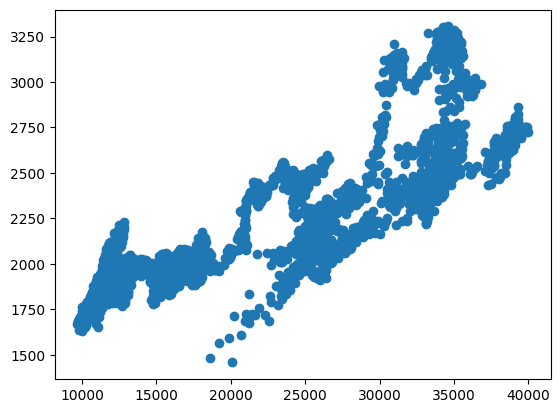

In [56]:
plt.scatter(df['DOW'], df['KOSPI'])

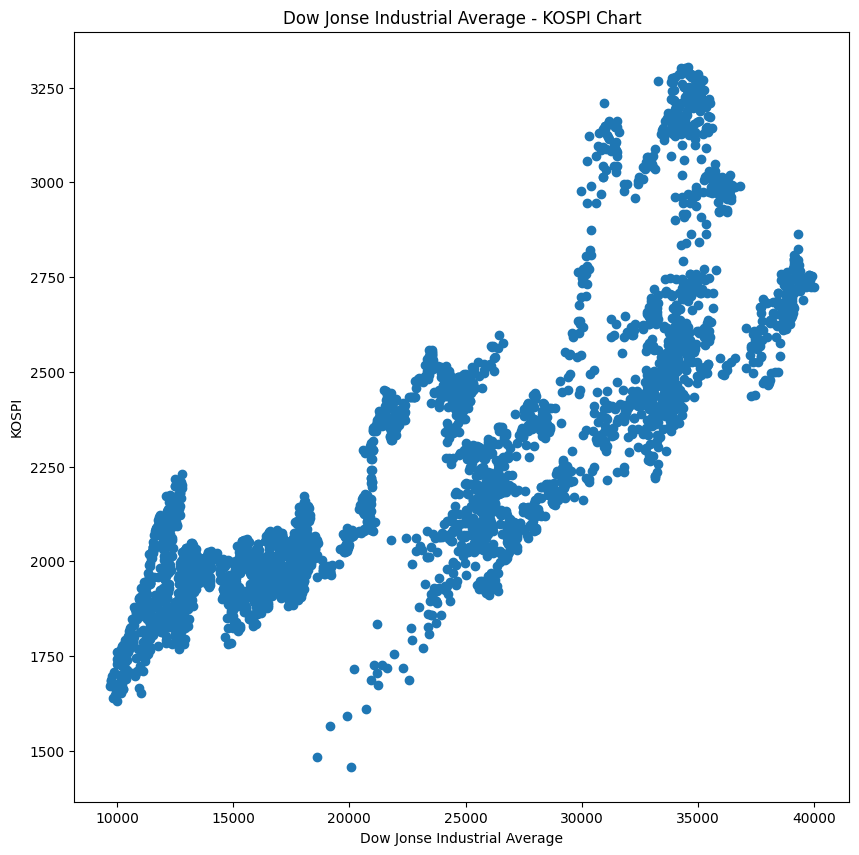

In [57]:
plt.figure(figsize=(10, 10))
plt.title('Dow Jonse Industrial Average - KOSPI Chart')
plt.xlabel('Dow Jonse Industrial Average')
plt.ylabel('KOSPI')
plt.scatter(df['DOW'], df['KOSPI'])

In [ ]:
# 5-3. 다우존스지수와 코스피지수의 선형회귀


In [58]:
from scipy import stats

In [59]:
# 간단한 선형 회귀 모델 생성

model = stats.linregress(df['DOW'], df['KOSPI'])
model.slope, model.intercept

(0.03517308551340685, 1429.895249024613)

In [60]:
# 5-4. 다우존스지수와 코스피지수의 상관 계수와 결정 계수

In [61]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.828549
KOSPI,0.828549,1.000000


In [62]:
df['DOW'].corr(df['KOSPI'])


0.828549213614011

In [63]:
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2
r_squared

0.686493799380396

In [64]:
regr_line = f'Y = {model.slope:.2f} * X + {model.intercept:.2f}'
regr_line

'Y = 0.04 * X + 1429.90'

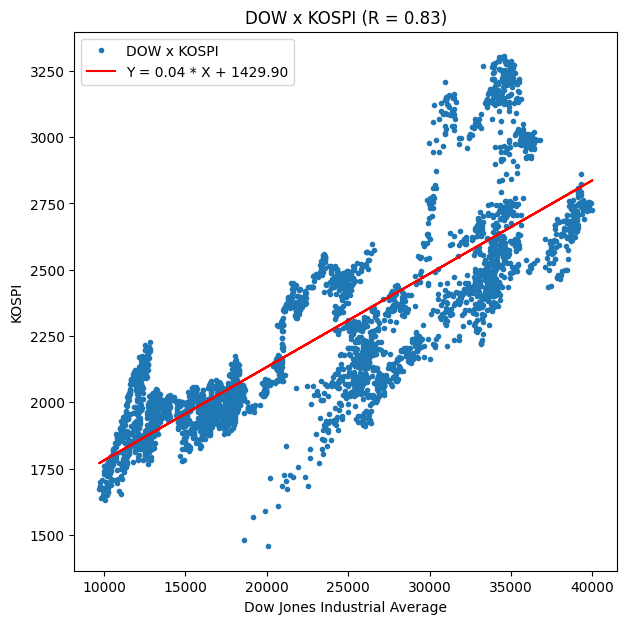

In [65]:
plt.figure(figsize=(7,7))
plt.plot(df['DOW'], df['KOSPI'], '.')
plt.plot(df['DOW'], model.slope * df['DOW'] + model.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {model.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()


# 6. RNN을 이용한 주가 예측

In [66]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 종목에 대한 데이터를 2018년 5월 4일부터 2020년 1월 22일까지 로드
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [67]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)


In [68]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx


,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [69]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()


In [70]:
# 데이터 전처리 - 10일 동안의 OHLVC 데이터로 다음 날의 종가를 예측

window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)


[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [71]:
# 훈련 데이터와 테스트 데이터를 분리
print('전체 데이터의 크기 :', len(data_X), len(data_y))
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)


전체 데이터의 크기 : 411 411
훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


In [72]:
# 모델 학습

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)


Epoch 1/70
10/10 [==============================] - 9s 146ms/step - loss: 0.0656
Epoch 2/70
10/10 [==============================] - 0s 28ms/step - loss: 0.0252
Epoch 3/70
10/10 [==============================] - 0s 25ms/step - loss: 0.0080
Epoch 4/70
10/10 [==============================] - 0s 28ms/step - loss: 0.0079
Epoch 5/70
10/10 [==============================] - 1s 57ms/step - loss: 0.0067
Epoch 6/70
10/10 [==============================] - 1s 53ms/step - loss: 0.0058
Epoch 7/70
10/10 [==============================] - 0s 44ms/step - loss: 0.0049
Epoch 8/70
10/10 [==============================] - 1s 57ms/step - loss: 0.0049
Epoch 9/70
10/10 [==============================] - 1s 100ms/step - loss: 0.0047
Epoch 10/70
10/10 [==============================] - 0s 42ms/step - loss: 0.0051
Epoch 11/70
10/10 [==============================] - 0s 27ms/step - loss: 0.0047
Epoch 12/70
10/10 [==============================] - 0s 28ms/step - loss: 0.0044
Epoch 13/70
10/10 [================

4/4 [==============================] - 0s 5ms/step


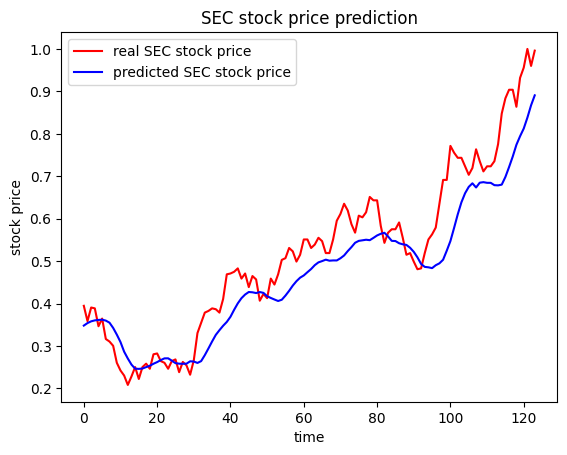

내일 SEC 주가 : [55709.984] KRW


In [74]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')
